<a href="https://colab.research.google.com/github/Nagalakshmigithub62/ANN/blob/main/ANN_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import to_categorical

Data loading and preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = f"/content/drive/MyDrive/data/Train/{i}/"
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")

Cells=np.array(data)
labels=np.array(labels)

s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

/content/drive/MyDrive/data/Train/0/
/content/drive/MyDrive/data/Train/1/
/content/drive/MyDrive/data/Train/2/
/content/drive/MyDrive/data/Train/3/
/content/drive/MyDrive/data/Train/4/
/content/drive/MyDrive/data/Train/5/
/content/drive/MyDrive/data/Train/6/
/content/drive/MyDrive/data/Train/7/
/content/drive/MyDrive/data/Train/8/
/content/drive/MyDrive/data/Train/9/
/content/drive/MyDrive/data/Train/10/
/content/drive/MyDrive/data/Train/11/
/content/drive/MyDrive/data/Train/12/
/content/drive/MyDrive/data/Train/13/
/content/drive/MyDrive/data/Train/14/
/content/drive/MyDrive/data/Train/15/
/content/drive/MyDrive/data/Train/16/
/content/drive/MyDrive/data/Train/17/
/content/drive/MyDrive/data/Train/18/
/content/drive/MyDrive/data/Train/19/
/content/drive/MyDrive/data/Train/20/
/content/drive/MyDrive/data/Train/21/
/content/drive/MyDrive/data/Train/22/
/content/drive/MyDrive/data/Train/23/
/content/drive/MyDrive/data/Train/24/
/content/drive/MyDrive/data/Train/25/
/content/drive/MyDrive

Data splitting

In [ ]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

One-Hot Encoding

In [ ]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model training

In [ ]:
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

Epoch 1/5
751/751 [==============================] - 102s 133ms/step - loss: 1.3178 - accuracy: 0.6192 - val_loss: 0.1789 - val_accuracy: 0.9639
Epoch 2/5
751/751 [==============================] - 94s 125ms/step - loss: 0.2411 - accuracy: 0.9265 - val_loss: 0.0595 - val_accuracy: 0.9867
Epoch 3/5
751/751 [==============================] - 95s 126ms/step - loss: 0.1349 - accuracy: 0.9590 - val_loss: 0.0318 - val_accuracy: 0.9947
Epoch 4/5
751/751 [==============================] - 95s 126ms/step - loss: 0.0960 - accuracy: 0.9705 - val_loss: 0.0307 - val_accuracy: 0.9942
Epoch 5/5
751/751 [==============================] - 94s 125ms/step - loss: 0.0775 - accuracy: 0.9757 - val_loss: 0.0202 - val_accuracy: 0.9967


Display of the accuracy values

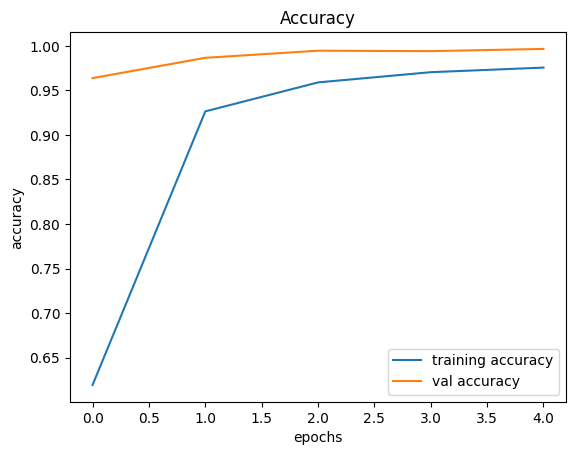

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

Display of the loss values

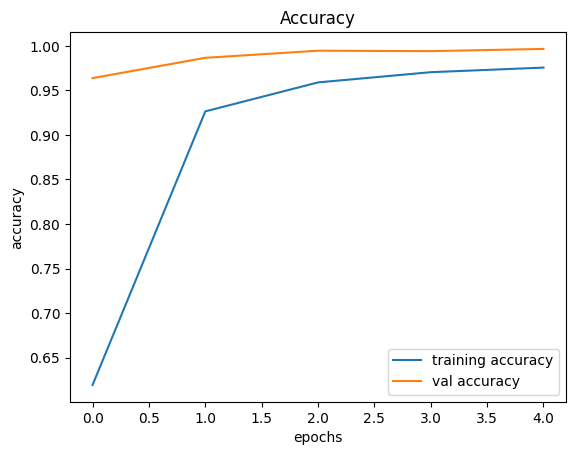

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()